In [43]:
# Dependencies
import json
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import datetime

In [44]:
# Import Twitter API Keys
from config2 import consumer_key, consumer_secret, access_token, access_token_secret

In [45]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [46]:
# Target Hashtags
target_user =["@BBC", "@CBSNews", "@cnni", "@FoxNews", "@nytimes"]

In [47]:
# List for dictionaries of results
results_list = []
results_2_list = []

In [48]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [49]:
# Loop through each user
for user in target_user:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 10 pages of tweets (total 200 tweets)
    for x in range(1, 6):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

    # Create a dictionaty of results
    user_results = {
        "Username": user,
        "Compound Score": np.mean(compound_list),
        "Postive Score": np.mean(positive_list),
        "Neutral Score": np.mean(neutral_list),
        "Negative Score": np.mean(negative_list)
    }
    
    user_results_list = {
        "Username": user,
        "Compound Score": (compound_list),
        "Postive Score": (positive_list),
        "Neutral Score": (neutral_list),
        "Negative Score": (negative_list)
    }
    results_2_list.append(user_results_list)
    # Append dictionary to list
    results_list.append(user_results)

    # Print the Averages
    print(f"User: {user}")
    print(f"Compound: {np.mean(compound_list):.3f}")
    print(f"Positive: {np.mean(positive_list):.3f}")
    print(f"Neutral: {np.mean(neutral_list):.3f}")
    print(f"Negative: {np.mean(negative_list):.3f}")

User: @BBC
Compound: 0.133
Positive: 0.089
Neutral: 0.880
Negative: 0.031
User: @CBSNews
Compound: -0.129
Positive: 0.051
Neutral: 0.850
Negative: 0.099
User: @cnni
Compound: -0.034
Positive: 0.040
Neutral: 0.906
Negative: 0.054
User: @FoxNews
Compound: 0.033
Positive: 0.084
Neutral: 0.851
Negative: 0.065
User: @nytimes
Compound: 0.042
Positive: 0.078
Neutral: 0.861
Negative: 0.061


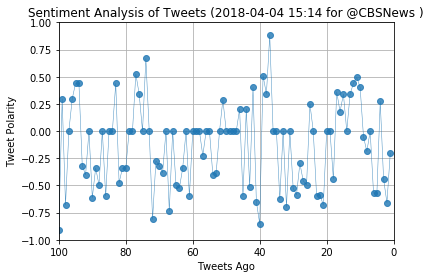

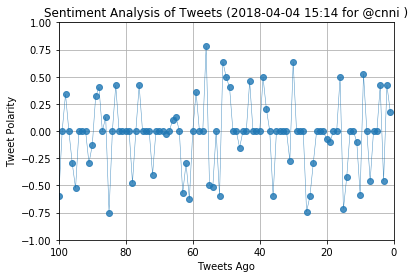

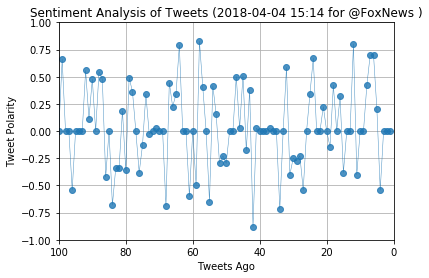

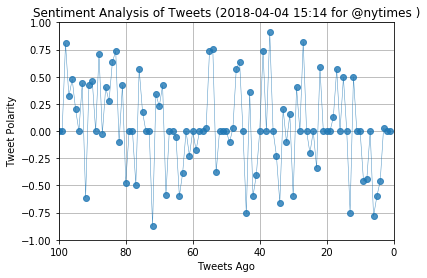

In [65]:
for x in range(1, 5):
    df = pd.DataFrame(results_2_list[x])
    df["timestamp"] = range(1, 101)
    
    # Create plot
    x_vals = df["timestamp"]
    y_vals = df["Compound Score"]
    plt.plot(x_vals,
             y_vals, marker="o", linewidth=0.5,
             alpha=0.8)

# # Incorporate the other graph properties
    now = datetime.now()
    now = now.strftime("%Y-%m-%d %H:%M")
    plt.title(f"Sentiment Analysis of Tweets ({now} for {target_user[x]} )")
    plt.xlim([100,0]) #Bonus
    plt.ylim([-1,1]) #Bonus
    plt.ylabel("Tweet Polarity")
    plt.xlabel("Tweets Ago")
    plt.grid()
    plt.show()

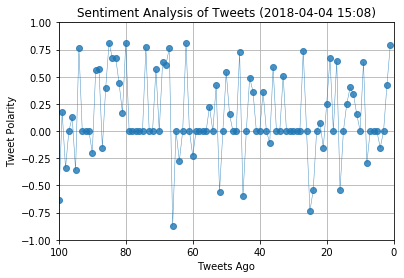

In [ ]:
 
    
    plt.plot(x_vals,
             y_vals, marker="o", linewidth=0.5,
             alpha=0.8)

# # Incorporate the other graph properties
    now = datetime.now()
    now = now.strftime("%Y-%m-%d %H:%M")
    plt.title(f"Sentiment Analysis of Tweets ({now} for {target_user[x]} )")
    plt.xlim([100,0]) #Bonus
    plt.ylim([-1,1]) #Bonus
    plt.ylabel("Tweet Polarity")
    plt.xlabel("Tweets Ago")
    plt.grid()
    plt.show()